In [ ]:

# TASK 4: MACHINE LEARNING & VISUALISATION


import pandas as pd
import numpy as np

# --------------------------
# 1️ LOAD DATASET
# --------------------------

df = pd.read_csv(r"C:\Users\Asus\Downloads\Big_data Analytics_\amz_ca_total_products_data_processed.csv")

print("First 5 rows of dataset:")
print(df.head())

# Drop clearly useless columns for ML
df = df.drop(columns=["asin", "title", "imgUrl", "productURL"])

print("\nColumns after dropping useless ones:")
print(df.columns)


First 5 rows of dataset:
         asin                                              title  \
0  B07CV4L6HX  Green Leaf WW3D Wonder Extension Cord Winder, ...   
1  B09N1HGY74  8pcs Toilet Seat Bumpers Universal Toilet Repl...   
2  B087P7538J  YaeCCC 19 Pcs Hole Saw Kit 3/4''(19mm)- 6''(15...   
3  B0822FF7YQ  LLPT Butyl Putty Tape White 1 Inch x 33Ft Tigh...   
4  B08NTR8NN4  Lightbeam 16" Long Stem Deep Fry Thermometer w...   

                                              imgUrl  \
0  https://m.media-amazon.com/images/I/81cRe0AVC4...   
1  https://m.media-amazon.com/images/I/512CpB-EP5...   
2  https://m.media-amazon.com/images/I/71P+qLFDFc...   
3  https://m.media-amazon.com/images/I/61wfWLZRn-...   
4  https://m.media-amazon.com/images/I/61qJG-y1He...   

                            productURL  stars  reviews  price  listPrice  \
0  https://www.amazon.ca/dp/B07CV4L6HX    4.4     2876  47.69       0.00   
1  https://www.amazon.ca/dp/B09N1HGY74    3.8       55  10.99       0.00   
2

In [27]:
from sklearn.impute import SimpleImputer

# Identify numeric and categorical columns
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill missing values
num_imputer = SimpleImputer(strategy="median")
df[num_cols] = num_imputer.fit_transform(df[num_cols])

cat_imputer = SimpleImputer(strategy="most_frequent")
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

print("\nMissing values after imputation:")
print(df.isnull().sum())



Missing values after imputation:
stars                0
reviews              0
price                0
listPrice            0
categoryName         0
isBestSeller         0
boughtInLastMonth    0
dtype: int64


In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["categoryName"] = le.fit_transform(df["categoryName"])
df["isBestSeller"] = df["isBestSeller"].astype(int)

print("\nData after encoding:")
print(df.head())



Data after encoding:
   stars  reviews  price  listPrice  categoryName  isBestSeller  \
0    4.4   2876.0  47.69       0.00            55             0   
1    3.8     55.0  10.99       0.00            55             0   
2    4.0    126.0  25.99      27.99            55             0   
3    4.5   1936.0  21.99      30.99            55             0   
4    4.2     46.0  18.99       0.00            55             0   

   boughtInLastMonth  
0                0.0  
1              100.0  
2               50.0  
3              100.0  
4              100.0  


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
X = df.drop("stars", axis=1)   # Features
y = df["stars"]                # Target (Rating Prediction)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Data ready for ML training!")


Data ready for ML training!


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Model Evaluation Results:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Model Evaluation Results:
MAE: 0.22120140255336962
R² Score: 0.955659216717092


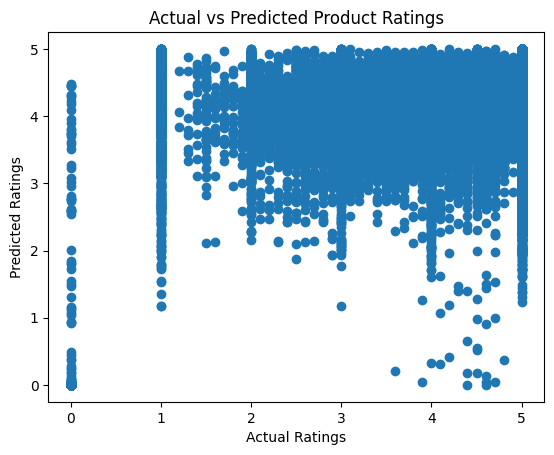

In [31]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Product Ratings")
plt.show()


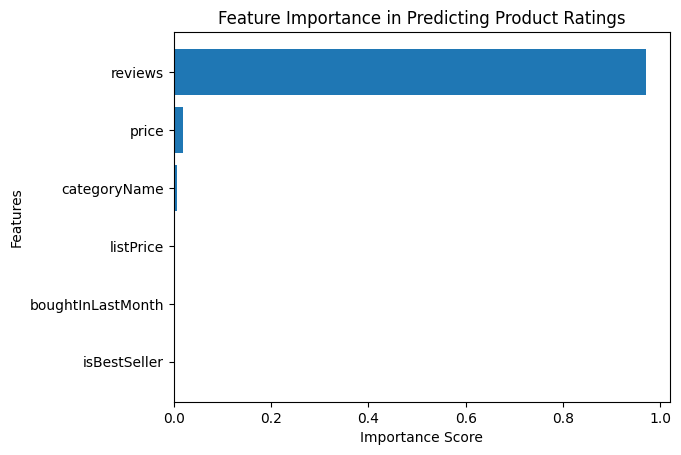

In [32]:
import pandas as pd

feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=True)

plt.figure()
plt.barh(feature_importance["Feature"], feature_importance["Importance"])
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Predicting Product Ratings")
plt.show()
